In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
test_data = pd.read_csv('task2_lemmas_test', sep=',', header=0, encoding='utf-8')

In [4]:
train_data = pd.read_csv('task2_lemmas_train', sep=',', header=0, encoding='utf-8')

In [5]:
test_data[test_data['X'].isin(train_data['X'])]

,Id,X


In [6]:
def prepare_data_for_learning():
    for i in range(1, 6):
        train_data['y{}_w'.format(i)] = train_data['y{}'.format(i)].apply(lambda x: x.split('+')[0] if pd.notnull(x) else x)
        train_data['y{}_t'.format(i)] = train_data['y{}'.format(i)].apply(lambda x: x.split('+')[1] if pd.notnull(x) else x)
    train_data.drop(['y{}'.format(i) for i in range(1, 6)], inplace=True, axis=1)

In [7]:
prepare_data_for_learning()

In [8]:
len(train_data[pd.isnull(train_data['y2_w']) == False])

2163

In [9]:
def max_prefix_len(s1, s2):
    i = 0
    board = min(len(s1), len(s2))
    while s1[i] == s2[i]:
        i += 1
        if (i >= board):
            break
    return i

In [10]:
for i in range(1, 6):
    train_data['y{}_l'.format(i)] = train_data['y{}_w'.format(i)].apply(lambda x: len(x) if pd.notnull(x) else x)
train_data['X_l'] = train_data['X'].apply(lambda x: len(x))

In [11]:
for i in range(1, 6):
    train_data['max_prefix{}'.format(i)] = [max_prefix_len(s1, s2)
                                            if (pd.notnull(s1) and pd.notnull(s2)) else s2
                                            for (s1, s2)
                                            in zip(train_data['X'], train_data['y{}_w'.format(i)])
                                           ]

In [12]:
max_prefix_and_X_len = train_data[train_data['y1_t'] == 'V'][['max_prefix1', 'X_l']]

In [13]:
mp = max_prefix_and_X_len['max_prefix1']
xl = max_prefix_and_X_len['X_l']

(array([  1.37587883e-01,   1.77643794e-01,   1.97132803e-01,
          1.45802474e-01,   7.41399453e-02,   8.54230558e-02,
          1.38996099e-02,   1.64291824e-03,   5.21561346e-05,
          8.69268910e-06]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ]),
 <a list of 10 Patch objects>)

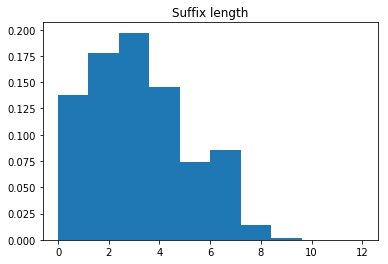

In [14]:
plt.title('Suffix length')
plt.hist(xl-mp, normed=True)

In [15]:
len(train_data[train_data['X_l'] - train_data['max_prefix1'] <= 4])

98413

In [16]:
len(train_data)

118640

In [17]:
# слова в правильной форме
len(train_data[train_data['X_l'] - train_data['max_prefix1'] == 0])

14302

In [18]:
words_in_correct_form = train_data[train_data['X'] == train_data['y1_w']]

In [19]:
correct_words = list(words_in_correct_form['X'])
in_correct_form = [s for s in train_data['y1_w'] if s in correct_words]

In [20]:
len(in_correct_form)

94068

In [21]:
len(train_data[train_data['max_prefix1'] == 0])  # возможно выбросы

70

In [22]:
corrupted = train_data[train_data['max_prefix1'] == 0]['X']

In [23]:
len(train_data[train_data['X'].isin(corrupted)])

70

действительно, других таких X нет, а сами данные вообще-то сильно отличаются от ответовьь

In [24]:
train_data[train_data['max_prefix1'] == 0]

,Id,X,y1_w,y1_t,y2_w,y2_t,y3_w,y3_t,y4_w,y4_t,...,y2_l,y3_l,y4_l,y5_l,X_l,max_prefix1,max_prefix2,max_prefix3,max_prefix4,max_prefix5
2500,2501,cotiate,scuotere,V,percuotere,V,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,7,0,0.0,NaN,NaN,NaN
6881,6882,siederai,risedere,V,soprassedere,V,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,8,0,1.0,NaN,NaN,NaN
7325,7326,sarò,essere,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,0,NaN,NaN,NaN,NaN
7347,7348,escono,uscire,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,0,NaN,NaN,NaN,NaN
9254,9255,sistette,desistere,V,esistere,V,consistere,V,NaN,NaN,...,8.0,10.0,NaN,NaN,8,0,0.0,0.0,NaN,NaN
10108,10109,siedano,risedere,V,soprassedere,V,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,7,0,1.0,NaN,NaN,NaN
10526,10527,fosser,essere,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,0,NaN,NaN,NaN,NaN
10805,10806,siamo,essere,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,0,NaN,NaN,NaN,NaN
11315,11316,sii,essere,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,0,NaN,NaN,NaN,NaN
13195,13196,cotesti,scuotere,V,percuotere,V,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,7,0,0.0,NaN,NaN,NaN


In [25]:
train_data.drop(train_data[train_data['X'].isin(corrupted)].index, inplace=True)

In [26]:
train_data[train_data['max_prefix1'] <= 3]

,Id,X,y1_w,y1_t,y2_w,y2_t,y3_w,y3_t,y4_w,y4_t,...,y2_l,y3_l,y4_l,y5_l,X_l,max_prefix1,max_prefix2,max_prefix3,max_prefix4,max_prefix5
48,49,osanti,osare,A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,3,NaN,NaN,NaN,NaN
122,123,panerò,panare,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,3,NaN,NaN,NaN,NaN
174,175,cociamo,cuocere,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7,1,NaN,NaN,NaN,NaN
234,235,libo,libare,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN
272,273,trii,trio,N,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN
284,285,covò,covare,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN
338,339,minerete,minare,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8,3,NaN,NaN,NaN,NaN
448,449,vagherà,vagare,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7,3,NaN,NaN,NaN,NaN
526,527,crebber,crescere,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7,3,NaN,NaN,NaN,NaN
594,595,geleran,gelare,V,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7,3,NaN,NaN,NaN,NaN


In [61]:
def prefixes(s):
    return [s[:i] for i in range(len(s))]

In [62]:
def suffixes(s):
    return [s[i:] for i in range(len(s))]

In [63]:
def tokenizer(s):
    return prefixes(s) + suffixes(s)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
# from vowpalwabbit.sklearn_vw import VWRegressor
from collections import Counter

In [31]:
c = (Counter([s[-3:] for s in train_data['y1_w']]))

In [32]:
a, b = np.sum([*map(lambda x: x[1], c.most_common(4))]), len(train_data)
a, b

(100217, 118570)

In [33]:
a / b

0.84521379775659944

In [34]:
informative_suffixes = [*filter(lambda x: x[1] > 1000, (Counter([s[-3:] for s in train_data['y1_w']])).items())]

In [35]:
a, b = np.sum([*map(lambda x: x[1], informative_suffixes)]), len(train_data)
a, b

(103619, 118570)

In [36]:
def apply_for_train(f):
    result = []
    for i in range(1, 6):
        result += [f(s) for s in train_data['y{}_w'.format(i)] if pd.notnull(s)]
    return result

In [37]:
suffixes = apply_for_train(lambda s: s[-3:])
c = Counter(suffixes)

In [94]:
count_differences = Counter([s2[max_prefix_len(s1, s2):]
 for (s1, s2) in zip(train_data['X'], train_data['y1_w'])
                            ])

In [103]:
def suf_dif(s1, s2):
    return s2[max_prefix_len(s1, s2):]

In [95]:
len(count_differences)

81

In [96]:
np.sum([s for s in count_differences.values()])

118570

In [97]:
np.sum([s for s in sorted(count_differences.values())[-5:]])

109481

In [98]:
count_differences.most_common()

[('re', 49291),
 ('are', 30125),
 ('', 13383),
 ('e', 9493),
 ('o', 7189),
 ('ere', 2216),
 ('iare', 1765),
 ('a', 1605),
 ('ire', 1378),
 ('rre', 829),
 ('gere', 179),
 ('ndere', 175),
 ('ore', 122),
 ('ggere', 79),
 ('dere', 79),
 ('uocere', 63),
 ('nere', 60),
 ('nire', 60),
 ('lere', 43),
 ('ettere', 33),
 ('ttere', 27),
 ('ia', 26),
 ('cere', 25),
 ('vere', 23),
 ('rere', 22),
 ('gliere', 22),
 ('io', 20),
 ('rsi', 17),
 ('rire', 17),
 ('urre', 16),
 ('arsi', 15),
 ('edere', 15),
 ('uovere', 11),
 ('imere', 11),
 ('ondere', 10),
 ('mpere', 10),
 ('ompere', 8),
 ('uotere', 8),
 ('enire', 7),
 ('scere', 7),
 ('guere', 7),
 ('uscire', 7),
 ('igere', 7),
 ('enere', 6),
 ('tere', 5),
 ('orire', 5),
 ('ssere', 5),
 ('ingere', 3),
 ('o-chiave', 3),
 ('ernere', 3),
 ('an', 2),
 ('aforte', 2),
 ('ogruppo', 2),
 ('y', 2),
 ('oviro', 1),
 ('oprassedere', 1),
 ('olista', 1),
 ('to', 1),
 ('a-ordinanza', 1),
 ('adonna', 1),
 ('a-paese', 1),
 ('a-partito', 1),
 ('a-gol', 1),
 ('o-stato', 1),
 (

Вывод: слова имеют вид корень-окончание. Значемых окончаний-замен всего 10

In [100]:
most_common_suffixes = [*map(lambda x: x[0], count_differences.most_common(10))]

In [101]:
most_common_suffixes

['re', 'are', '', 'e', 'o', 'ere', 'iare', 'a', 'ire', 'rre']

In [125]:
train_data['dif_suf'] = [suf_dif(s1, s2) if (suf_dif(s1, s2) in most_common_suffixes) else
                                        '-1'
                                        for (s1, s2)
                                        in zip(train_data['X'], train_data['y1_w'])
                                       ]

In [135]:
train_data.drop(train_data[train_data['dif_suf'] == '-1'].index, inplace=True)

In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [137]:
le.fit(most_common_suffixes)

LabelEncoder()

In [138]:
[*filter(lambda x: x[0] not in most_common_suffixes,
       [(s2[max_prefix_len(s1, s2):], s1, s2)
         for (s1, s2) in zip(train_data['X'], train_data['y1_w'])
         if len(s2[max_prefix_len(s1, s2):]) > 0]
      )
]

[]

In [58]:
[*filter(lambda x: x[0] in ['o', 'e', 'a'],
       [(s2[max_prefix_len(s1, s2):], s1, s2)
         for (s1, s2) in zip(train_data['X'], train_data['y1_w'])
         if len(s2[max_prefix_len(s1, s2):]) > 0]
      )
]

[('e', 'diromperanno', 'dirompere'),
 ('e', 'rombar', 'rombare'),
 ('o', 'balenieri', 'baleniero'),
 ('o', 'rialzata', 'rialzato'),
 ('o', 'turbolenta', 'turbolento'),
 ('e', 'mancarono', 'mancare'),
 ('e', 'indottrinar', 'indottrinare'),
 ('e', 'interpellar', 'interpellare'),
 ('e', 'assalir', 'assalire'),
 ('o', 'quintupli', 'quintuplo'),
 ('o', 'costiera', 'costiero'),
 ('o', 'poliziotti', 'poliziotto'),
 ('e', 'scompigliar', 'scompigliare'),
 ('e', 'strumentaron', 'strumentare'),
 ('o', 'umide', 'umido'),
 ('e', 'distillazioni', 'distillazione'),
 ('e', 'accertarono', 'accertare'),
 ('e', 'contitolar', 'contitolare'),
 ('o', 'demagoghi', 'demagogo'),
 ('o', 'raccoglimenti', 'raccoglimento'),
 ('e', 'investirà', 'investire'),
 ('o', 'maggioritaria', 'maggioritario'),
 ('a', 'trascuratezze', 'trascuratezza'),
 ('o', 'oligarchica', 'oligarchico'),
 ('e', 'muniron', 'munire'),
 ('e', 'latitar', 'latitare'),
 ('a', 'avversarie', 'avversaria'),
 ('e', 'viceprocuratori', 'viceprocuratore'

In [59]:
from sklearn.svm import SVC

In [75]:
estimator = LinearRegression()
vectorizer = CountVectorizer(tokenizer=tokenizer)
sparse_matrix = vectorizer.fit_transform(train_data['X'][:50000])

In [76]:
tt = TfidfTransformer().fit_transform(sparse_matrix)

In [83]:
estimator.fit(tt[:40000, :], train_data['y1_l'][:40000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
np.sum(np.abs(estimator.predict(tt[40000:]) - train_data['y1_l'][40000:50000]))  # l1 error

4474.7657471576895

In [92]:
rounded = np.array([*map(lambda x: round(x), estimator.predict(tt[40000:]))])
np.sum((rounded != train_data['y1_l'][40000:50000]))  # l1 error

2488

In [139]:
from sklearn.svm import LinearSVC

In [143]:
le.classes_
le.transform(['e'])

array([3])

In [169]:
%%time
pipeline = make_pipeline(CountVectorizer(tokenizer=tokenizer), TfidfTransformer(), LinearRegression())
arr = cross_val_score(pipeline, train_data['X'], train_data['y1_l'], cv=3)
print(arr)
print(np.mean(arr))

KeyboardInterrupt: 

In [170]:
%%time
pipeline = make_pipeline(CountVectorizer(tokenizer=tokenizer), TfidfTransformer(), LinearSVC())
arr = cross_val_score(pipeline, train_data['X'], train_data['y1_l'], cv=3)
print(arr)
print(np.mean(arr))

KeyboardInterrupt: 

In [164]:
%%time
pipeline = make_pipeline(CountVectorizer(tokenizer=tokenizer), TfidfTransformer(), LinearSVC())
arr = cross_val_score(pipeline, train_data['X'], le.transform(train_data['dif_suf']), cv=3)
print(arr)
print(np.mean(arr))

[ 0.94165644  0.93931952  0.94261666]
0.941197538115
CPU times: user 33.7 s, sys: 1.15 s, total: 34.8 s
Wall time: 36.2 s


In [214]:
class Predictor1337(object):
    def __init__(self):
        self.root_len_predictor = LinearSVC()
        self.suffix_predictor = LinearSVC()
#         self.vectorizer = CountVectorizer(tokenizer=tokenizer)

    def predict(self, X_test):
#         x_sp_matrix = self.vectorizer.transform(X_test)
        root_lens = self.root_len_predictor.predict(x_sp_matrix)
        suffixes = self.suffix_predictor.predict(x_sp_matrix)
        return [X_test[i][:root_lens[i]] + le.inverse_transform(suffixes[i]) for i in range(len(root_lens))]

    def fit(self, X_train, y_train):
#         sparse_matrix = self.vectorizer.fit_transform(X_train)
#         tt = TfidfTransformer().fit_transform(sparse_matrix)
        self.root_len_predictor.fit(tt, y_train['y1_l'])
        
        #fit suffix predictor
        self.suffix_predictor.fit(tt, le.transform(y_train['dif_suf']))
        
        

In [215]:
est = Predictor1337()

In [216]:
%%time
est.fit(train_data['X'][:50000], train_data[['y1_l', 'dif_suf']][:50000])

CPU times: user 15.5 s, sys: 388 ms, total: 15.9 s
Wall time: 16.3 s


In [217]:
pr_y = est.predict(list(train_data['X'][50000:]))

In [219]:
from sklearn.metrics import accuracy_score

In [224]:
accuracy_score(pr_y, train_data['y1_w'][50000:])

0.11997205458275113